1\. **Radioactive decay chain**

${\rm Tl}^{208}$ decays to ${\rm Pb}^{208}$ with a half-life $\tau$ of 3.052 minutes. Suppose to start with a sample of 1000 Thallium atoms and 0 of Lead atoms.

* Take steps in time of 1 second and at each time-step decide whether each Tl atom has decayed or not, accordingly to the probability $p(t)=1-2^{-t/\tau}$. Subtract the total number of Tl atoms that decayed at each step from the Tl sample and add them to the Lead one. Plot the evolution of the two sets as a function of time  
* Repeat the exercise by means of the inverse transform method: draw 1000 random numbers from the non-uniform probability distribution $p(t)=2^{-t/\tau}\frac{\ln 2}{\tau}$ to represent the times of decay of the 1000 Tl atoms. Make a plot showing the number of atoms that have not decayed as a function of time

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
import random as rnd

Text(0.5, 1.0, 'inverse transform method')

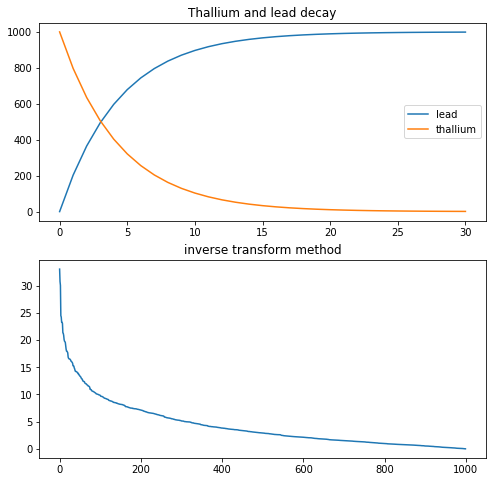

In [2]:
def p_t(t,T):
    return (1 - pow(2,-t/T))

thallium_atoms = 1000
lead_atoms = 0
T = 3.052
t = 0

#vector to be populated each iteration
thallium_vector = [thallium_atoms] 
lead_vector = [lead_atoms]
time_vector = [t]

fig, (ax1,ax2) = plt.subplots(2,1,figsize=(8,8))

while(True): #iterate
    z = thallium_atoms * p_t(1,T)
    thallium_atoms -= z
    lead_atoms += z
    t +=1
    
    if(thallium_atoms < 1):
        break
        
    thallium_vector.append(thallium_atoms)
    lead_vector.append(lead_atoms)
    time_vector.append(t)
    
#plotting

ax1.set_title('Thallium and lead decay')
ax1.plot(time_vector,lead_vector, label="lead")
ax1.plot(time_vector,thallium_vector,label="thallium")
ax1.legend()


def p_t2(t,T):
    return (-T * np.log(1-t)/np.log(2))

decay = p_t2(np.random.random(1000),T)
ax2.plot(np.sort(decay)[::-1])
ax2.set_title("inverse transform method")

2\. **Monte Carlo integration: hit/miss vs mean value method**

Consider the function: 

$$f(x) =\sin^2{\left( \frac{1}{1-x} \right)}$$

* Plot the function and compute the integral of $f(x)$ between 0 and 2 with the hit/miss method. Evaluate the error of your estimate (hint: repeat the integral $N$ times, and from the distribution of the integrals take the mean value and the standard deviation, the latter rescaled by the appropriate factor)
* Repeat the integral with the mean value method. Evaluate the error and compare it with the previous one.

In [3]:
def f(x):
    return pow(np.sin(1/(1-x)),2) #this function is between 0 and 1
 
N = 100000 #number of iterations
x = np.linspace(0.001,1.999,1000) #linear space of x points between 0 and 2

count = 0 #number of hits


for i in range(N):
    x = np.random.random() * 2 #x is a point coordinate between 0 and 2
    y = np.random.random() #y is a random point between 0 and 1
    if (y < f(x)): #hit
        count += 1

A = 2*1 #area of the box
I = (count * A)/N

print("Result of integral with monte carlo hit/miss method:",I)


#let's calculate the mean of the function values
probing_sum = 0

for i in range(N):
    x = np.random.random() * 2 #x is a point coordinate between 0 and 2
    y = f(x) #calculate it's function value
    probing_sum += y

#calculate the mean
estimated_mean =  probing_sum/N
print("Estimated mean with probing:",estimated_mean)

I2 = (2-0)*estimated_mean
print("Result of integral with monte carlo mean value method:",I2)

print("Absolute error between the two measurements:", abs(I2-I))


Result of integral with monte carlo hit/miss method: 1.34036
Estimated mean with probing: 0.6724238274819314
Result of integral with monte carlo mean value method: 1.3448476549638628
Absolute error between the two measurements: 0.0044876549638628305


3\. **Monte Carlo integration in high dimension**

* Compute the area of a circle of unit radius, by integrating the function:

$$
f(x,y)=
\left\{
\begin{array}{ll}
      1 & x^2+y^2\le 1 \\
      0 & {\rm elsewhere}
\end{array} 
\right.
$$

* Generalize the result for a 10D sphere.

Result of integral with monte carlo hit/miss method of the circle: 3.141064
Error between analytical result:  0.0005286535897930378
Calculating integral of a 10D sphere (it may take some time...)
Result of integral with monte carlo hit/miss method of the 10D sphere: 2.59584


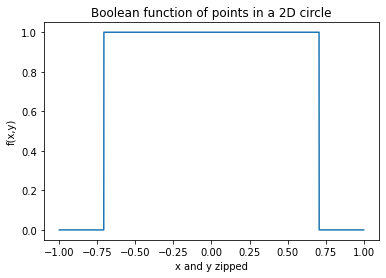

In [4]:
def f_circle(x,y):
    if (x**2+y**2) <= 1:
        return 1
    else:
        return 0

#N = 100000 #number of iterations
N = 1000000 #number of iterations

x = np.linspace(-0.999,0.999,2000) #linear space of x points between -1 and 1
y =  np.linspace(-0.999,0.999,2000) #linear space of y points between -1 and 1

z_results = []
for xi,yi in zip(x,y):
    z_results.append(f_circle(xi,yi))
    
plt.title("Boolean function of points in a 2D circle")  
plt.xlabel("x and y zipped")
plt.ylabel("f(x,y)")
plt.plot(x,z_results)

count = 0 #number of hits

for i in range(N):
    x = rnd.uniform(-1,1) #x is a point coordinate between -1 and 1
    y = rnd.uniform(-1,1) #y is a random point between -1 and 1
    if (f_circle(x,y)): #hit
        count += 1

A = 2*2 #area of the box
I = (count * A)/N

print("Result of integral with monte carlo hit/miss method of the circle:",I)
print("Error between analytical result: ",math.pi - I)




def f_10D_sphere(variables):
    res = 0
    #print("in function param recived:",variables)
    for v in variables:
        res += v**2 #sum the square of all the 10 variables values
    if res <= 1: #if is less or equal than 1, the point sits in the 10D sphere
        return 1
    else:
        return 0

D = 10 #number of dimensions
count = 0

print("Calculating integral of a 10D sphere (it may take some time...)")

for i in range(N):
    variables = []
    for j in range(D): #for each dimension
        variables.append(np.random.random())#append a random number between 0 and 1 to the 10 variables vector
    if(f_10D_sphere(variables)):
        count += 1
        
A = 2**D #area of the box
I = (count * A)/N

print("Result of integral with monte carlo hit/miss method of the 10D sphere:",I)





4\. **Monte Carlo integration with importance sampling** 

Calculate the value of the integral:

$$
I=\int_0^1 \frac{x^{-1/2}}{e^x+1} dx
$$

using the importance sampling method with $w(x)=1/\sqrt{x}$. You should expect a result around 0.84.